In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [15]:
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

In [16]:
df=pd.read_csv("C:/Users/ayhan/Desktop/musteri_seg.csv").copy()

In [17]:
df.head()

,maas,aylik_harcama,cinsiyet,yas
0,2198.0,72.0,1,31
1,5533.0,3775.0,0,40
2,3796.0,167.0,1,28
3,2062.0,527.0,0,18
4,2070.0,848.0,1,21


In [18]:
df.shape

(2889, 4)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2889 entries, 0 to 2888
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   maas           2889 non-null   float64
 1   aylik_harcama  2889 non-null   float64
 2   cinsiyet       2889 non-null   int64  
 3   yas            2889 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 90.4 KB


In [20]:
df.isna().sum()

maas             0
aylik_harcama    0
cinsiyet         0
yas              0
dtype: int64

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
maas,2889.0,3881.688474,1883.228959,1658.0,2224.0,3485.0,5255.0,9855.0
aylik_harcama,2889.0,1345.364486,1097.576170,0.0,544.0,907.0,2129.0,4637.0
cinsiyet,2889.0,0.505365,0.500058,0.0,0.0,1.0,1.0,1.0
yas,2889.0,33.608169,11.892385,18.0,25.0,31.0,39.0,78.0


array([[<AxesSubplot:title={'center':'maas'}>,
        <AxesSubplot:title={'center':'aylik_harcama'}>],
       [<AxesSubplot:title={'center':'cinsiyet'}>,
        <AxesSubplot:title={'center':'yas'}>]], dtype=object)

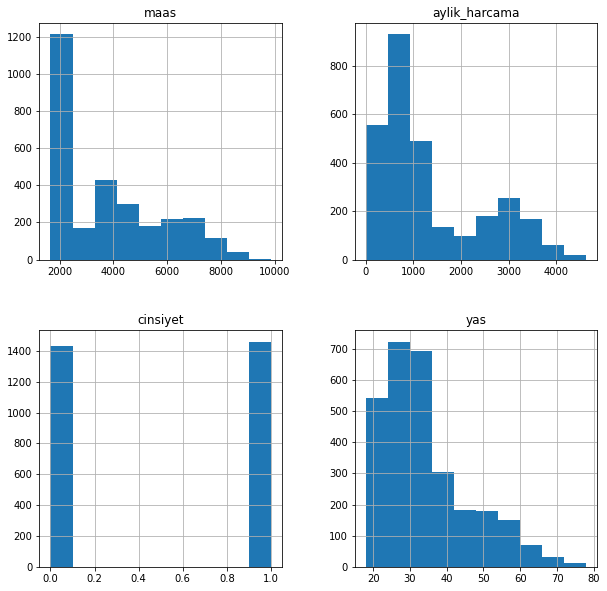

In [22]:
df.hist(figsize=(10,10))

In [23]:
kmodel=KMeans()
kmodel


KMeans()

In [24]:
k_means_model=kmodel.fit(df)

In [25]:
k_means_model.n_clusters

8

In [26]:
k_means_model.cluster_centers_

array([[7.95614013e+03, 3.07253503e+03, 7.07006369e-01, 4.78662420e+01],
       [2.23551174e+03, 5.46007825e+02, 4.02190923e-01, 2.53411581e+01],
       [4.48660831e+03, 5.43643917e+02, 4.98516320e-01, 3.24747774e+01],
       [6.55468246e+03, 3.42135545e+03, 6.68246445e-01, 4.91279621e+01],
       [5.40705628e+03, 2.98500866e+03, 6.96969697e-01, 4.95367965e+01],
       [2.19967572e+03, 1.19062142e+03, 4.19306184e-01, 2.45505279e+01],
       [3.61740938e+03, 4.96356077e+02, 4.84008529e-01, 3.24925373e+01],
       [6.79992857e+03, 2.41014835e+03, 6.42857143e-01, 5.00934066e+01]])

In [27]:
k_means_model.labels_

array([1, 4, 6, ..., 2, 4, 5])

In [28]:
pip install yellowbrick

  Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)
Note: you may need to restart the kernel to use updated packages.


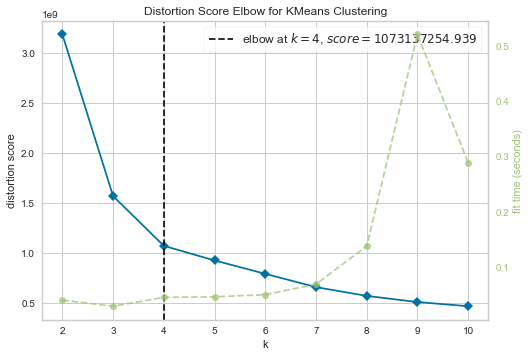

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
from yellowbrick.cluster import KElbowVisualizer
kmeans=KMeans()
ylizer=KElbowVisualizer(kmeans,k=(2,11))
ylizer.fit(df)
ylizer.poof()

In [30]:
sonuclar=[]


In [33]:
for i in range(1,11):
    k_means = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    k_means.fit(df)
    sonuclar.append(k_means.inertia_)

In [34]:
sonuclar

[13721946275.436481,
 3185593177.1019096,
 1570151128.03574,
 1073149927.2111442,
 927248069.0444474,
 793605618.3916469,
 660605179.2758559,
 572922681.6558888,
 511410585.3066826,
 469398151.3941009]

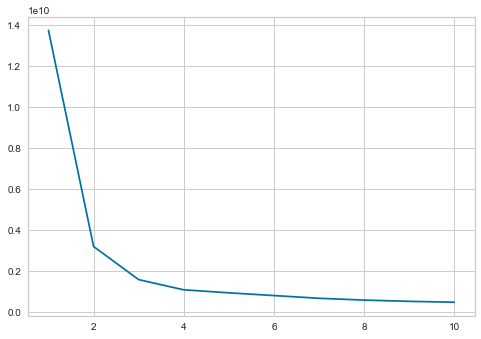

In [35]:
plt.plot(range(1,11),sonuclar)
plt.show()

In [36]:
kmodel=KMeans(n_clusters=4)
kmodel

KMeans(n_clusters=4)

In [37]:
k_means_model=kmodel.fit(df)

In [38]:
k_means_model.n_clusters

4

In [39]:
k_means_model.cluster_centers_

array([[2.23253429e+03, 8.67908817e+02, 4.09947249e-01, 2.50798794e+01],
       [7.37218538e+03, 2.94156658e+03, 6.78851175e-01, 4.91540470e+01],
       [4.01163427e+03, 5.17629156e+02, 4.93606138e-01, 3.25153453e+01],
       [5.77073048e+03, 3.03183123e+03, 6.80100756e-01, 4.92695214e+01]])

In [41]:
k_means_model.labels_

array([0, 3, 2, ..., 2, 3, 0])

In [42]:
kumeler=k_means_model.labels_

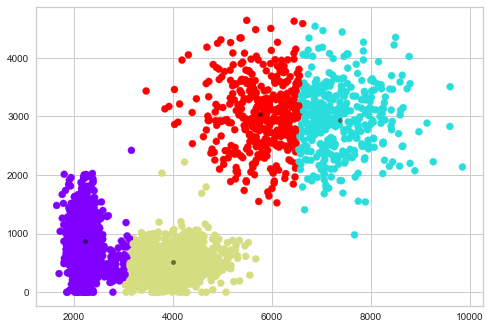

In [43]:
plt.scatter(df["maas"],df["aylik_harcama"],c=kumeler,s=50,cmap="rainbow")
merkezler=k_means_model.cluster_centers_
plt.scatter(merkezler[:,0],merkezler[:,1],c="black",s=20,alpha=0.5)

In [44]:
from mpl_toolkits.mplot3d import Axes3D

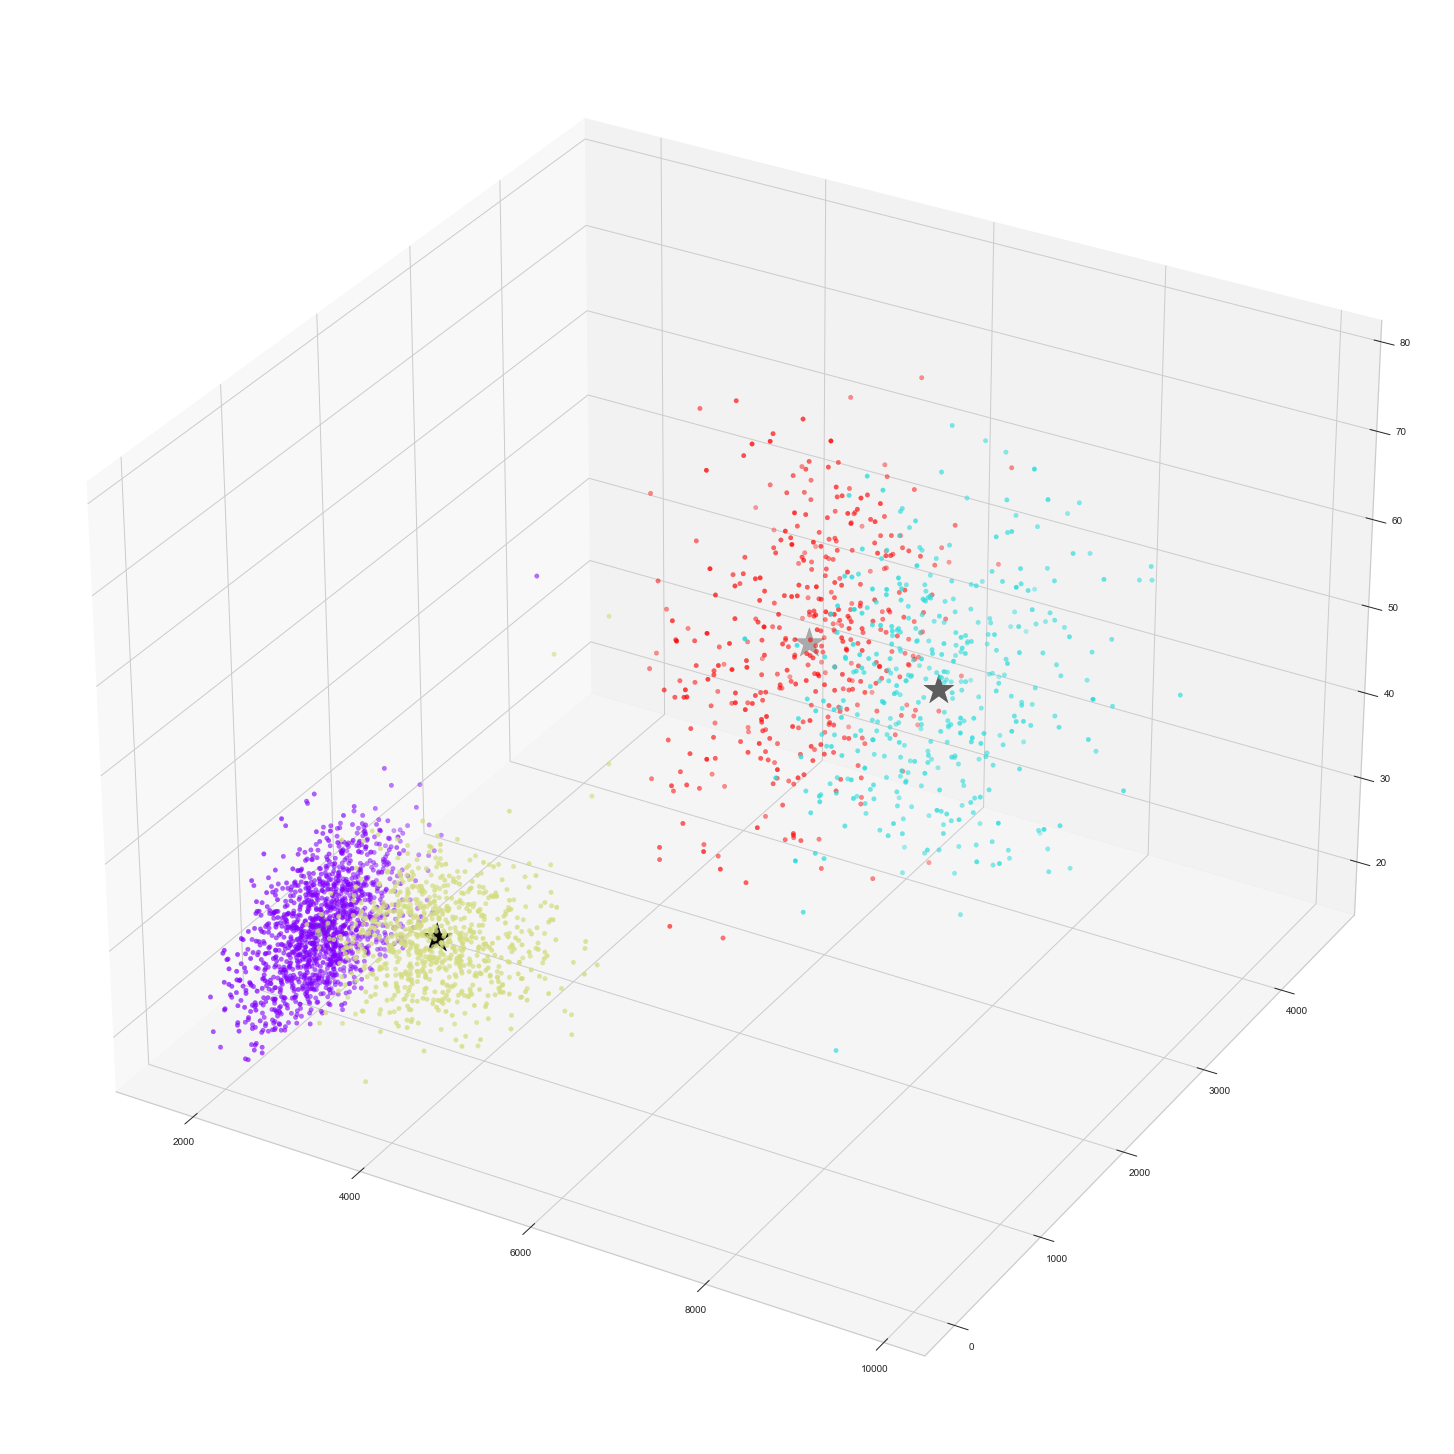

In [45]:
fig=plt.figure()
fig.set_size_inches(24,20,24)
ax=Axes3D(fig)
ax.scatter(df["maas"],df["aylik_harcama"],df["yas"],c=kumeler,cmap="rainbow")
ax.scatter(merkezler[:,0],merkezler[:,1],merkezler[:,3],marker='*',c='#050505',cmap="rainbow",s=1000)
plt.show()

In [47]:
df_kumelenmis=df.copy()

In [48]:
df_kumelenmis["kume_no"]=kumeler

In [49]:
df_kumelenmis.head(10)

,maas,aylik_harcama,cinsiyet,yas,kume_no
0,2198.0,72.0,1,31,0
1,5533.0,3775.0,0,40,3
2,3796.0,167.0,1,28,2
3,2062.0,527.0,0,18,0
4,2070.0,848.0,1,21,0
5,2025.0,988.0,0,23,0
6,5996.0,3110.0,0,67,3
7,6741.0,3718.0,1,71,1
8,7272.0,3656.0,1,51,1
9,7898.0,3049.0,0,56,1


In [50]:
from sklearn.cluster import AgglomerativeClustering

In [51]:
ac=AgglomerativeClustering(n_clusters=4,affinity="euclidean",linkage="ward")
ac_model=ac.fit(df)

In [52]:
kumeler_ac=ac_model.labels_

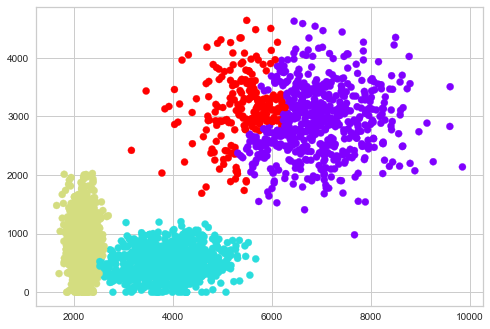

In [53]:
plt.scatter(df["maas"],df["aylik_harcama"],c=kumeler_ac,s=50,cmap="rainbow")

In [56]:
import scipy.cluster.hierarchy as sch 

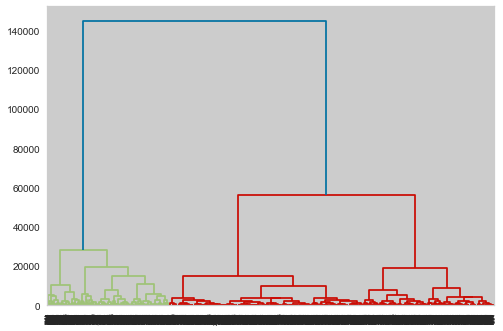

In [57]:
dendogram=sch.dendrogram(sch.linkage(df,method="ward"))
plt.show()

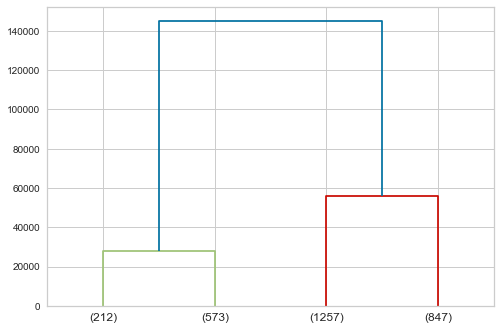

In [58]:
dendogram=sch.dendrogram(sch.linkage(df,method="ward"),truncate_mode="lastp",p=4)
plt.show()

In [59]:
kumeler_ac

array([2, 3, 1, ..., 1, 3, 2], dtype=int64)

In [60]:
df_kumelenmis["kume_no_ac"]=kumeler_ac

In [61]:
df_kumelenmis.head(10)

,maas,aylik_harcama,cinsiyet,yas,kume_no,kume_no_ac
0,2198.0,72.0,1,31,0,2
1,5533.0,3775.0,0,40,3,3
2,3796.0,167.0,1,28,2,1
3,2062.0,527.0,0,18,0,2
4,2070.0,848.0,1,21,0,2
5,2025.0,988.0,0,23,0,2
6,5996.0,3110.0,0,67,3,3
7,6741.0,3718.0,1,71,1,0
8,7272.0,3656.0,1,51,1,0
9,7898.0,3049.0,0,56,1,0


In [63]:
farklilik=0
for i in df_kumelenmis.index:
    if df_kumelenmis.loc[i,"kume_no"]!=df_kumelenmis.loc[i,"kume_no_ac"]:
        farklilik=farklilik+1
    else:
        continue
    print(farklilik,"gözlem farklı kümelenmiştir")

1 gözlem farklı kümelenmiştir
2 gözlem farklı kümelenmiştir
3 gözlem farklı kümelenmiştir
4 gözlem farklı kümelenmiştir
5 gözlem farklı kümelenmiştir
6 gözlem farklı kümelenmiştir
7 gözlem farklı kümelenmiştir
8 gözlem farklı kümelenmiştir
9 gözlem farklı kümelenmiştir
10 gözlem farklı kümelenmiştir
11 gözlem farklı kümelenmiştir
12 gözlem farklı kümelenmiştir
13 gözlem farklı kümelenmiştir
14 gözlem farklı kümelenmiştir
15 gözlem farklı kümelenmiştir
16 gözlem farklı kümelenmiştir
17 gözlem farklı kümelenmiştir
18 gözlem farklı kümelenmiştir
19 gözlem farklı kümelenmiştir
20 gözlem farklı kümelenmiştir
21 gözlem farklı kümelenmiştir
22 gözlem farklı kümelenmiştir
23 gözlem farklı kümelenmiştir
24 gözlem farklı kümelenmiştir
25 gözlem farklı kümelenmiştir
26 gözlem farklı kümelenmiştir
27 gözlem farklı kümelenmiştir
28 gözlem farklı kümelenmiştir
29 gözlem farklı kümelenmiştir
30 gözlem farklı kümelenmiştir
31 gözlem farklı kümelenmiştir
32 gözlem farklı kümelenmiştir
33 gözlem farklı 

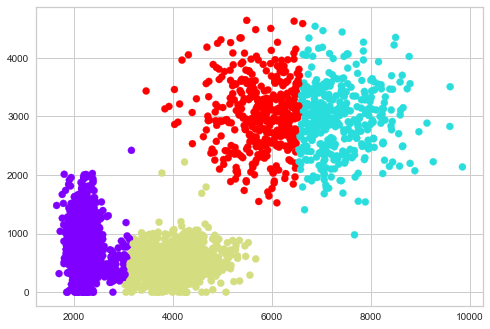

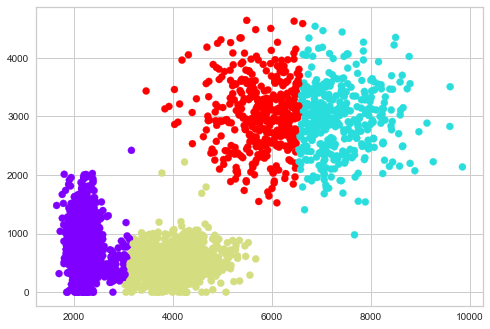

In [64]:
plt.scatter(df["maas"],df["aylik_harcama"],c=kumeler,s=50,cmap="rainbow")
plt.show()
plt.scatter(df["maas"],df["aylik_harcama"],c=kumeler,s=50,cmap="rainbow")
plt.show()


In [65]:
from sklearn.preprocessing import StandardScaler
df=StandardScaler().fit_transform(df)
df[0:6,0:5]

array([[-0.8941982 , -1.16036131,  0.9893266 , -0.21935216],
       [ 0.87700297,  2.21402048, -1.01078855,  0.53756564],
       [-0.0455087 , -1.07379197,  0.9893266 , -0.4716581 ],
       [-0.96642709, -0.74573973, -1.01078855, -1.31267788],
       [-0.96217834, -0.45322648,  0.9893266 , -1.06037194],
       [-0.9860776 , -0.32565061, -1.01078855, -0.89216799]])

In [66]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
pca_fit=pca.fit_transform(df)

In [67]:
pca_fit[:5,:5]

array([[-1.06602795, -1.24045383,  0.5974241 ],
       [ 1.81012796,  1.43088924, -1.28749236],
       [-0.67171146, -1.16587351,  0.60882289],
       [-1.92543536,  0.61150003, -0.33329673],
       [-1.19295221, -1.27261677, -0.43721293]])

In [69]:
bilesen_df = pd.DataFrame(data = pca_fit, 
                          columns = ["component_1","component_2","component_3"])

In [70]:
bilesen_df.head()

,component_1,component_2,component_3
0,-1.066028,-1.240454,0.597424
1,1.810128,1.430889,-1.287492
2,-0.671711,-1.165874,0.608823
3,-1.925435,0.611500,-0.333297
4,-1.192952,-1.272617,-0.437213


In [71]:
pca.explained_variance_ratio_

array([0.63790384, 0.23154718, 0.08050935])

In [72]:
pca=PCA().fit(df)

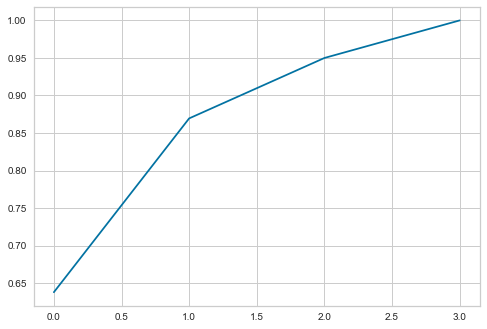

In [74]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))